In [14]:
pip install pandas scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


In [54]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
import pandas as pd

# Load the dataset
data = pd.read_csv('index.csv')

# Display the first few rows
print(data.head())


         date datetime cash_type                 card  money    coffee_name
0  01-03-2024  15:50.5      card  ANON-0000-0000-0001   38.7          Latte
1  01-03-2024  19:22.5      card  ANON-0000-0000-0002   38.7  Hot Chocolate
2  01-03-2024  20:18.1      card  ANON-0000-0000-0002   38.7  Hot Chocolate
3  01-03-2024  46:33.0      card  ANON-0000-0000-0003   28.9      Americano
4  01-03-2024  48:14.6      card  ANON-0000-0000-0004   38.7          Latte


In [37]:
data

,date,datetime,cash_type,card,money,coffee_name,month,year,hour
0,2024-03-01,2024-03-01 15:50:05,card,ANON-0000-0000-0001,38.70,Latte,3,2024,15
1,2024-03-01,2024-03-01 19:22:05,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,2024,19
2,2024-03-01,2024-03-01 20:18:01,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,2024,20
6,2024-03-01,2024-03-01 19:02:08,card,ANON-0000-0000-0006,38.70,Hot Chocolate,3,2024,19
8,2024-03-01,2024-03-01 22:01:08,card,ANON-0000-0000-0008,38.70,Cocoa,3,2024,22
...,...,...,...,...,...,...,...,...,...
1110,2024-07-30,2024-07-30 16:19:03,card,ANON-0000-0000-0436,32.82,Cappuccino,7,2024,16
1117,2024-07-31,2024-07-31 11:42:06,card,ANON-0000-0000-0384,32.82,Cocoa,7,2024,11
1118,2024-07-31,2024-07-31 14:00:03,card,ANON-0000-0000-0384,32.82,Latte,7,2024,14
1121,2024-07-31,2024-07-31 04:15:00,card,ANON-0000-0000-0440,32.82,Latte,7,2024,4


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [56]:
print(data.isnull().sum())

data.describe().T

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [58]:
data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


In [61]:
data[data['card'].isnull()]['cash_type'].value_counts()

cash    89
Name: cash_type, dtype: int64

In [31]:
# Filter out rows where 'normalized_time' could not be parsed (i.e., None values)
data = data[data['normalized_time'].notna()]

# Combine 'date' and 'normalized_time' into a single datetime column
data['datetime'] = data.apply(lambda row: datetime.combine(row['date'], row['normalized_time']), axis=1)

# Drop the original 'date' and 'datetime' columns if no longer needed
data.drop(columns=['normalized_time'], inplace=True)

# Check the cleaned data
data.head()



C:\Users\akansha rawat\AppData\Local\Temp\ipykernel_5336\2998829865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data.apply(lambda row: datetime.combine(row['date'], row['normalized_time']), axis=1)
C:\Users\akansha rawat\AppData\Local\Temp\ipykernel_5336\2998829865.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['normalized_time'], inplace=True)


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 15:50:05,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 19:22:05,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 20:18:01,card,ANON-0000-0000-0002,38.7,Hot Chocolate
6,2024-03-01,2024-03-01 19:02:08,card,ANON-0000-0000-0006,38.7,Hot Chocolate
8,2024-03-01,2024-03-01 22:01:08,card,ANON-0000-0000-0008,38.7,Cocoa


<Axes: >

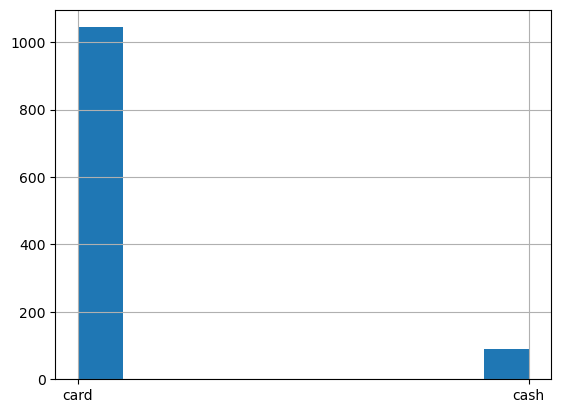

In [62]:
data['cash_type'].hist()

In [64]:
data['cash_type'].value_counts(normalize=True)

card    0.921447
cash    0.078553
Name: cash_type, dtype: float64

In [66]:
pd.DataFrame(data['coffee_name'].value_counts(normalize=True).sort_values(asc
ending=False).round(4)*100)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1107056609.py, line 1)

In [79]:
# Convert date and datetime to datetime format
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

# Create columns for Month, Day of Week, and Hour
data['month'] = data['date'].dt.strftime('%Y-%m')
data['day'] = data['date'].dt.day_name()  # or .dt.weekday() for numerical values (0=Monday, 6=Sunday)
data['hour'] = data['datetime'].dt.strftime('%H')

# Display the DataFrame with new columns
print(data.head())

ParserError: hour must be in 0..23: 46:33.0 present at position 3

In [71]:
[data['date'].min(),data['date'].max()]

[Timestamp('2024-01-03 00:00:00'), Timestamp('2024-12-07 00:00:00')]

In [77]:
# Group by coffee_name and sum the money column
revenue_data = data.groupby('coffee_name').sum('money').reset_index()

# Sort by money in descending order
revenue_data = revenue_data.sort_values(by='money', ascending=False)

# Display the result
print(revenue_data)

           coffee_name    money
7                Latte  9009.14
1  Americano with Milk  8601.94
2           Cappuccino  7333.14
0            Americano  4644.54
6        Hot Chocolate  2778.48
4              Cortado  2745.08
3                Cocoa  1295.94
5             Espresso  1100.62


Text(0.5, 0, 'Revenue')

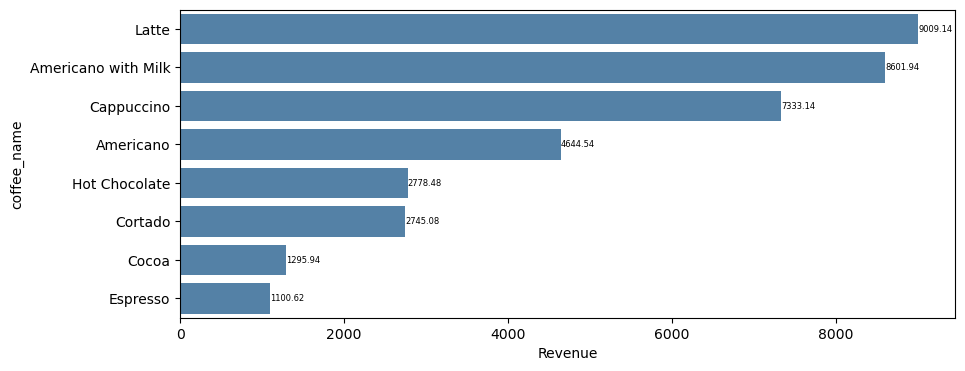

In [78]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')

In [82]:
# Ensure 'month' is extracted from 'date'
data['month'] = data['date'].dt.to_period('M')

# Group by 'coffee_name' and 'month', then count occurrences of 'date'
monthly_sales = data.groupby(['coffee_name', 'month']).size().reset_index(name='count')

# Pivot the table
monthly_sales_pivot = monthly_sales.pivot(index='month', columns='coffee_name', values='count').fillna(0)

# Reset index to get 'month' as a column instead of index
monthly_sales_pivot = monthly_sales_pivot.reset_index()

# Display the result
print(monthly_sales_pivot)

coffee_name    month  Americano  Americano with Milk  Cappuccino  Cocoa  \
0            2024-01        2.0                 12.0         5.0    3.0   
1            2024-02        7.0                 11.0         4.0    0.0   
2            2024-03       19.0                 24.0        17.0    4.0   
3            2024-04       24.0                 38.0        32.0    5.0   
4            2024-05       44.0                 52.0        48.0   10.0   
5            2024-06       18.0                 48.0        36.0    2.0   
6            2024-07       28.0                 51.0        31.0   10.0   
7            2024-08        7.0                  6.0         6.0    0.0   
8            2024-09        9.0                  9.0         9.0    0.0   
9            2024-10        2.0                  4.0         2.0    0.0   
10           2024-11        5.0                  7.0         5.0    1.0   
11           2024-12        4.0                  6.0         1.0    0.0   

coffee_name  Cortado  Es

In [84]:
monthly_sales_pivot.describe().T.loc[:,['min','max']]


,min,max
coffee_name,,
Americano,2.0,44.0
Americano with Milk,4.0,52.0
Cappuccino,1.0,48.0
Cocoa,0.0,10.0
Cortado,1.0,24.0
Espresso,0.0,12.0
Hot Chocolate,0.0,18.0
Latte,4.0,50.0


([<matplotlib.axis.XTick at 0x1ea69273450>,
 [Text(0, 0, '2024-01'),
  Text(1, 0, '2024-02'),
  Text(2, 0, '2024-03'),
  Text(3, 0, '2024-04'),
  Text(4, 0, '2024-05'),
  Text(5, 0, '2024-06'),
  Text(6, 0, '2024-07'),
  Text(7, 0, '2024-08'),
  Text(8, 0, '2024-09'),
  Text(9, 0, '2024-10'),
  Text(10, 0, '2024-11'),
  Text(11, 0, '2024-12'),
  Text(12, 0, '2024-01'),
  Text(13, 0, '2024-02'),
  Text(14, 0, '2024-03'),
  Text(15, 0, '2024-04'),
  Text(16, 0, '2024-05'),
  Text(17, 0, '2024-06'),
  Text(18, 0, '2024-07'),
  Text(19, 0, '2024-08'),
  Text(20, 0, '2024-09'),
  Text(21, 0, '2024-10'),
  Text(22, 0, '2024-11'),
  Text(23, 0, '2024-12'),
  Text(24, 0, '2024-01'),
  Text(25, 0, '2024-02'),
  Text(26, 0, '2024-03'),
  Text(27, 0, '2024-04'),
  Text(28, 0, '2024-05'),
  Text(29, 0, '2024-06'),
  Text(30, 0, '2024-07'),
  Text(31, 0, '2024-08'),
  Text(32, 0, '2024-09'),
  Text(33, 0, '2024-10'),
  Text(34, 0, '2024-11'),
  Text(35, 0, '2024-12'),
  Text(36, 0, '2024-01'),
  Te

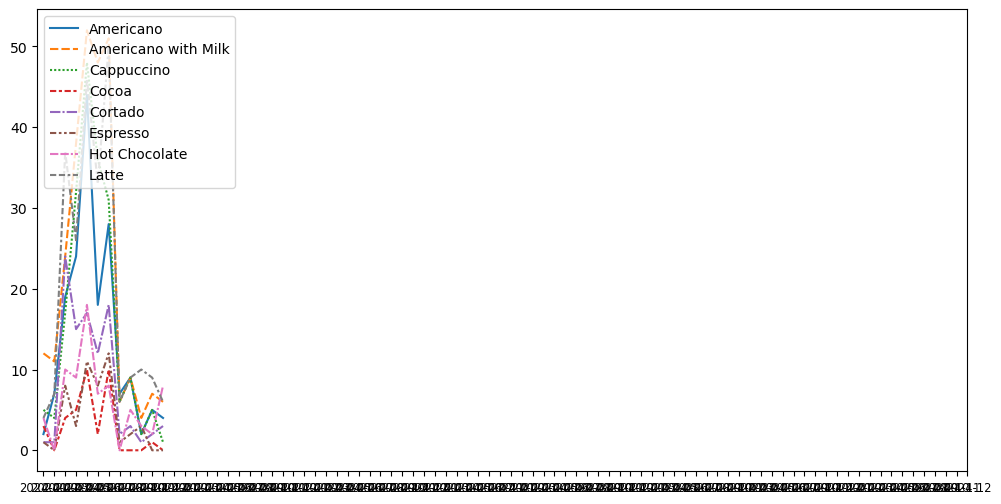

In [86]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales_)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')


([<matplotlib.axis.XTick at 0x1ea6995b750>,
 [Text(0, 0, '2024-01'),
  Text(1, 0, '2024-02'),
  Text(2, 0, '2024-03'),
  Text(3, 0, '2024-04'),
  Text(4, 0, '2024-05'),
  Text(5, 0, '2024-06'),
  Text(6, 0, '2024-07'),
  Text(7, 0, '2024-08'),
  Text(8, 0, '2024-09'),
  Text(9, 0, '2024-10'),
  Text(10, 0, '2024-11'),
  Text(11, 0, '2024-12'),
  Text(12, 0, '2024-01'),
  Text(13, 0, '2024-02'),
  Text(14, 0, '2024-03'),
  Text(15, 0, '2024-04'),
  Text(16, 0, '2024-05'),
  Text(17, 0, '2024-06'),
  Text(18, 0, '2024-07'),
  Text(19, 0, '2024-08'),
  Text(20, 0, '2024-09'),
  Text(21, 0, '2024-10'),
  Text(22, 0, '2024-11'),
  Text(23, 0, '2024-12'),
  Text(24, 0, '2024-01'),
  Text(25, 0, '2024-02'),
  Text(26, 0, '2024-03'),
  Text(27, 0, '2024-04'),
  Text(28, 0, '2024-05'),
  Text(29, 0, '2024-06'),
  Text(30, 0, '2024-07'),
  Text(31, 0, '2024-08'),
  Text(32, 0, '2024-09'),
  Text(33, 0, '2024-10'),
  Text(34, 0, '2024-11'),
  Text(35, 0, '2024-12'),
  Text(36, 0, '2024-01'),
  Te

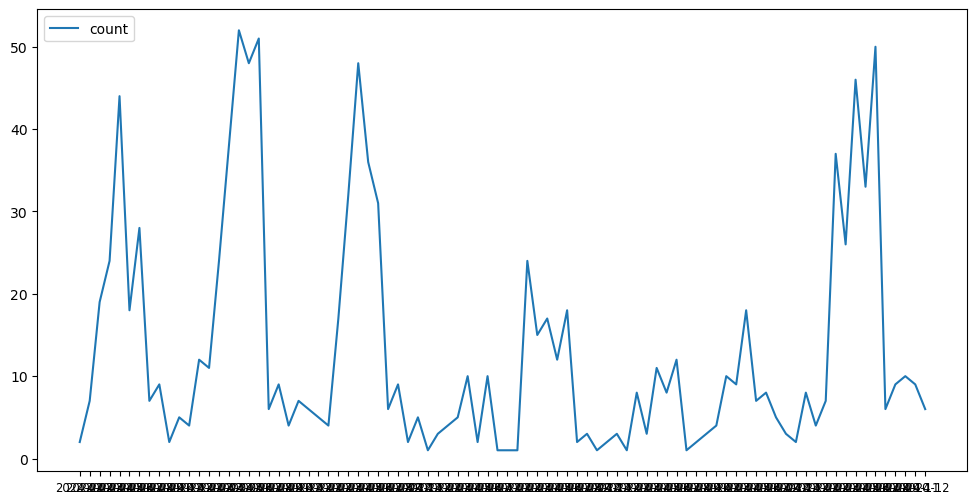

In [87]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')


C:\Users\akansha rawat\AppData\Local\Temp\ipykernel_5336\3569559155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['datetime'].dt.month
C:\Users\akansha rawat\AppData\Local\Temp\ipykernel_5336\3569559155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['datetime'].dt.year


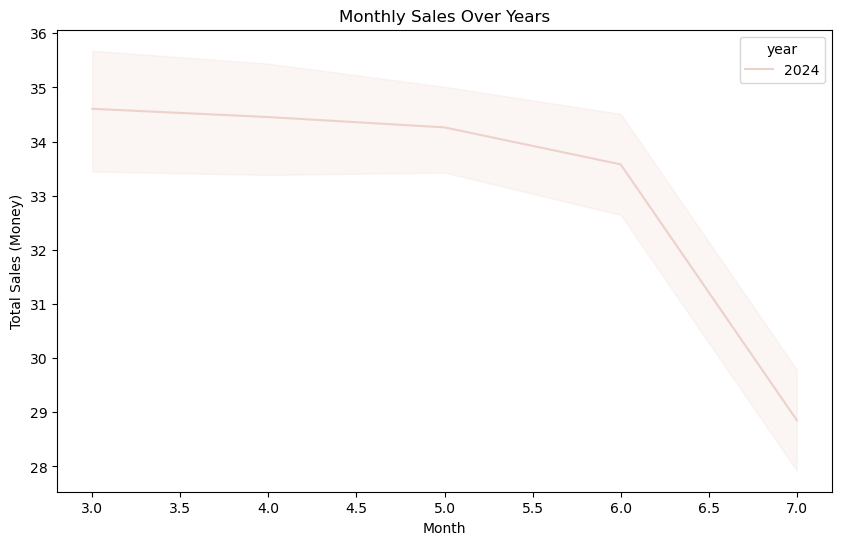

In [38]:
# Extract month and year for EDA
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year

# Plot: Monthly Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='month', y='money', hue='year')
plt.title('Monthly Sales Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales (Money)')
plt.show()


C:\Users\akansha rawat\AppData\Local\Temp\ipykernel_5336\3237816737.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='coffee_name', y='money', estimator=sum, ci=None)


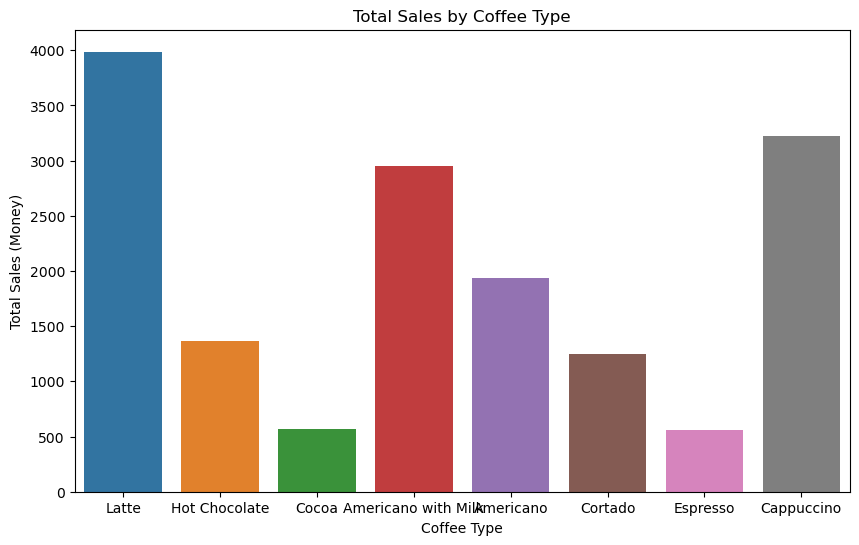

In [39]:
# Plot: Sales Distribution by Coffee Type
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='coffee_name', y='money', estimator=sum, ci=None)
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Sales (Money)')
plt.show()


C:\Users\akansha rawat\AppData\Local\Temp\ipykernel_5336\3435146061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['datetime'].dt.hour
C:\Users\akansha rawat\AppData\Local\Temp\ipykernel_5336\3435146061.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='hour', y='money', estimator=sum, ci=None)


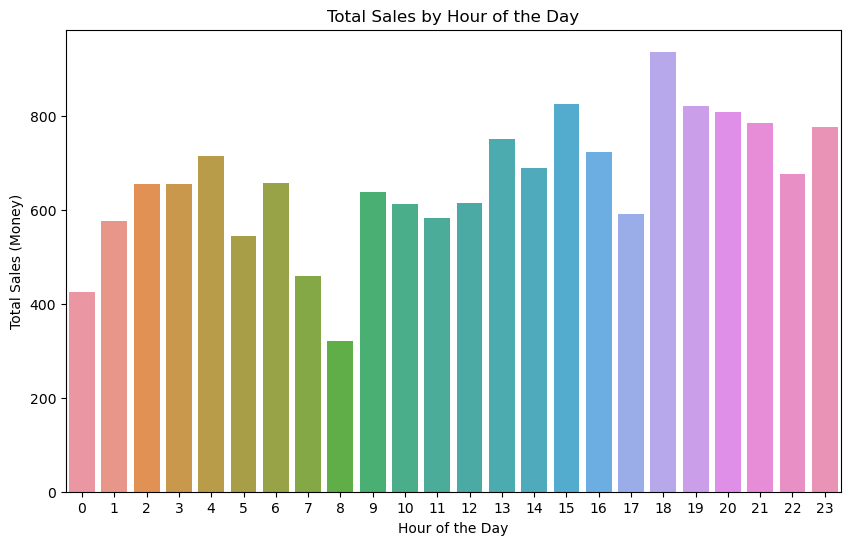

In [40]:
# Plot: Sales by Hour of the Day
data['hour'] = data['datetime'].dt.hour
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='hour', y='money', estimator=sum, ci=None)
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales (Money)')
plt.show()

In [91]:
# Ensure 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract the day of the week from the 'date' column
data['day'] = data['date'].dt.day_name()

# Group by 'day' and count occurrences of 'date'
weekday_sales = data.groupby(['day']).count()['date'].reset_index().rename(columns={'date': 'count'})

# Display the result
print(weekday_sales)

         day  count
0     Friday    152
1     Monday    125
2   Saturday    171
3     Sunday    143
4   Thursday    182
5    Tuesday    175
6  Wednesday    185


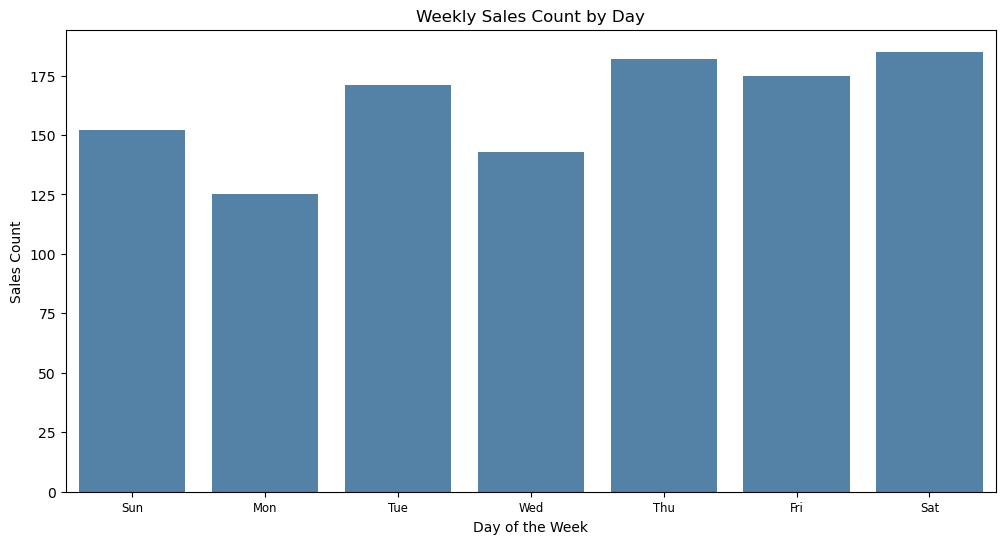

In [92]:
# Assuming weekday_sales is your DataFrame with columns 'day' and 'count'

plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=weekday_sales, x='day', y='count', color='steelblue')

# Customize x-ticks to show day names
plt.xticks(ticks=range(len(weekday_sales['day'])), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], size='small')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Sales Count')
plt.title('Weekly Sales Count by Day')

# Show the plot
plt.show()

In [94]:
# Ensure 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Group by 'coffee_name' and 'date' and count occurrences of 'datetime'
daily_sales = data.groupby(['coffee_name', 'date']).count()['datetime'] \
    .reset_index() \
    .rename(columns={'datetime': 'count'}) \
    .pivot(index='date', columns='coffee_name', values='count') \
    .reset_index() \
    .fillna(0)

# Display the result
print(daily_sales)

coffee_name       date  Americano  Americano with Milk  Cappuccino  Cocoa  \
0           2024-01-03        1.0                  4.0         0.0    1.0   
1           2024-01-04        1.0                  4.0         1.0    0.0   
2           2024-01-06        0.0                  4.0         2.0    2.0   
3           2024-01-07        0.0                  0.0         2.0    0.0   
4           2024-02-03        3.0                  3.0         0.0    0.0   
..                 ...        ...                  ...         ...    ...   
145         2024-12-03        3.0                  1.0         0.0    0.0   
146         2024-12-04        0.0                  0.0         0.0    0.0   
147         2024-12-05        1.0                  4.0         0.0    0.0   
148         2024-12-06        0.0                  1.0         1.0    0.0   
149         2024-12-07        0.0                  0.0         0.0    0.0   

coffee_name  Cortado  Espresso  Hot Chocolate  Latte  
0                0.0

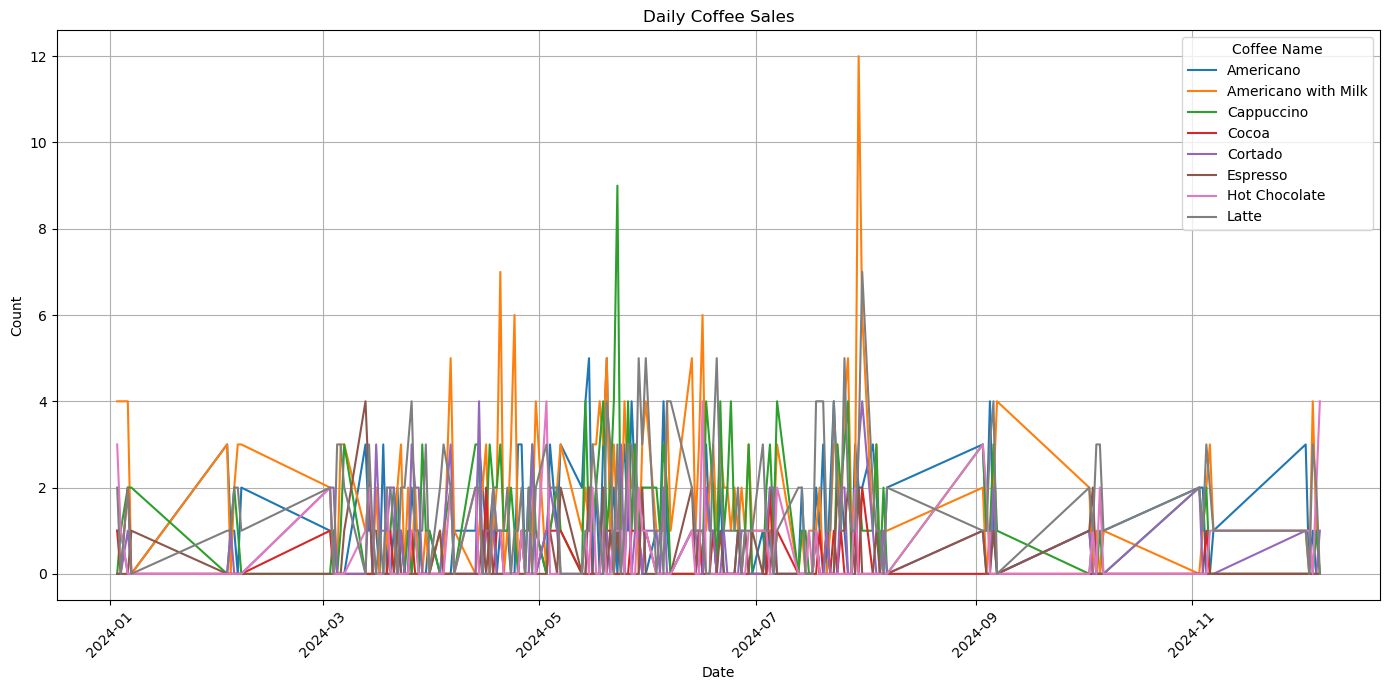

In [95]:
import matplotlib.pyplot as plt

# Plotting daily sales
plt.figure(figsize=(14,7))
for coffee in daily_sales.columns[1:]:  # Skip the 'date' column
    plt.plot(daily_sales['date'], daily_sales[coffee], label=coffee)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Coffee Sales')
plt.legend(title='Coffee Name')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [96]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


In [99]:
data['date'] = pd.to_datetime(data['date'])

# Extract hour from 'date' column
data['hour'] = data['date'].dt.hour

# Group by 'hour' and count occurrences of 'date'
hourly_sales = data.groupby(['hour']).count()['date'] \
    .reset_index() \
    .rename(columns={'date': 'count'})

# Display the result
print(hourly_sales)

   hour  count
0     0   1133


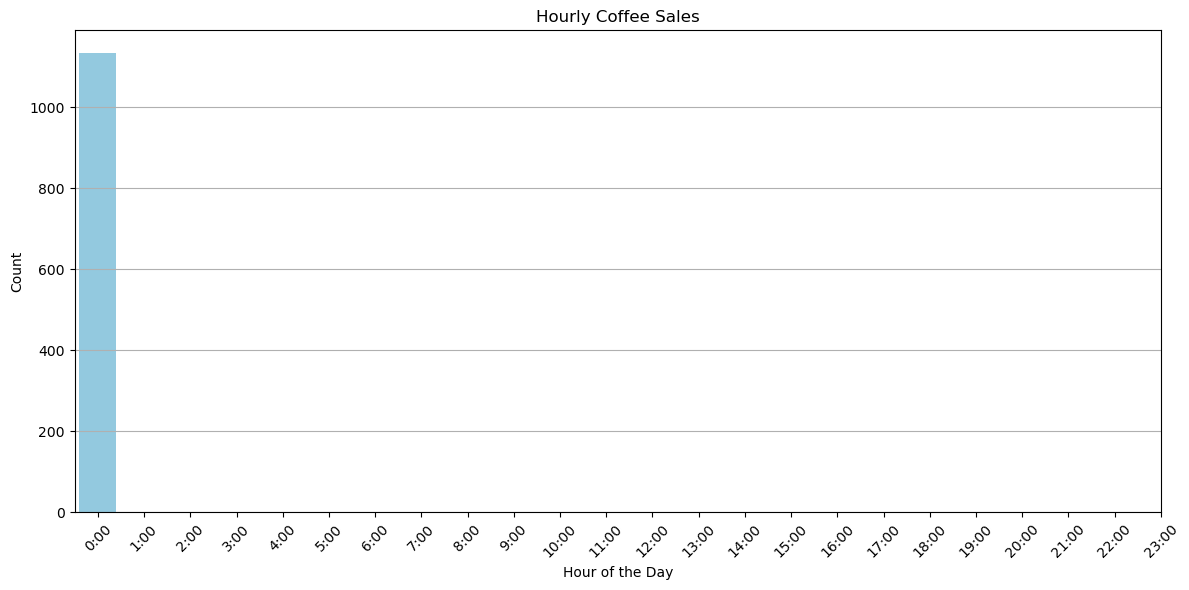

In [100]:
# Plotting hourly sales
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_sales, x='hour', y='count', color='skyblue')

plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Hourly Coffee Sales')
plt.xticks(range(24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [41]:
# Define features and target variable
X = data.drop(columns=['money'])
y = data['money']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

In [42]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>)

In [44]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


AttributeError: 'LinearRegression' object has no attribute 'coef_'

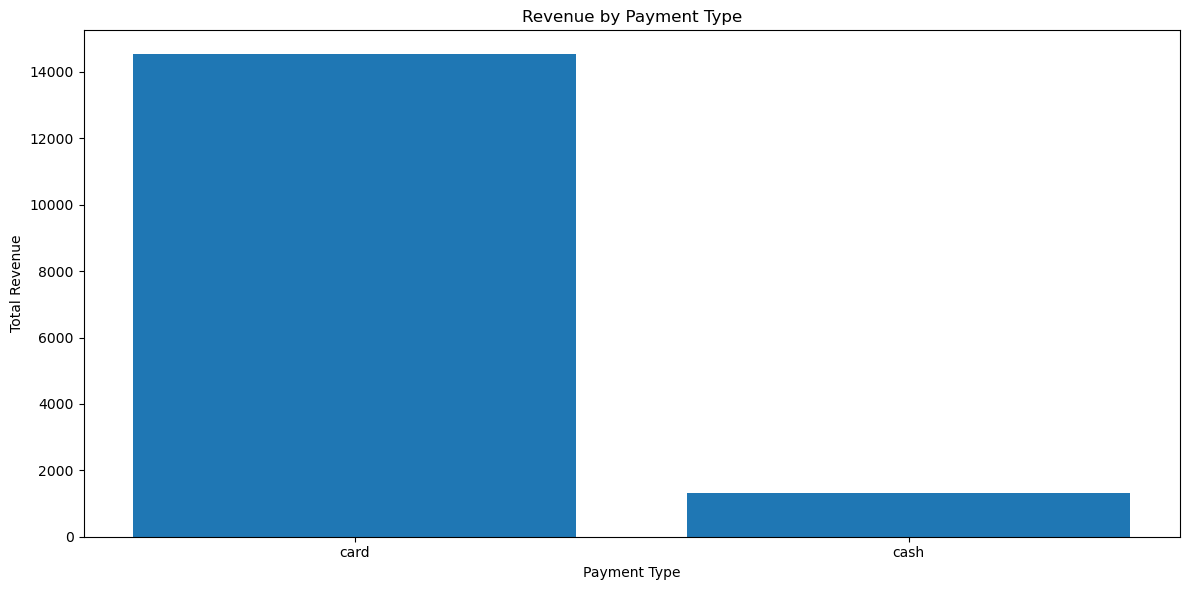

In [46]:
# Group by payment type and sum the revenue
payment_revenue = data.groupby('cash_type').money.sum().reset_index()

# Plot the revenue by payment type
plt.figure(figsize=(12, 6))
plt.bar(payment_revenue['cash_type'], payment_revenue['money'])
plt.xlabel('Payment Type')
plt.ylabel('Total Revenue')
plt.title('Revenue by Payment Type')
plt.tight_layout()
plt.show()


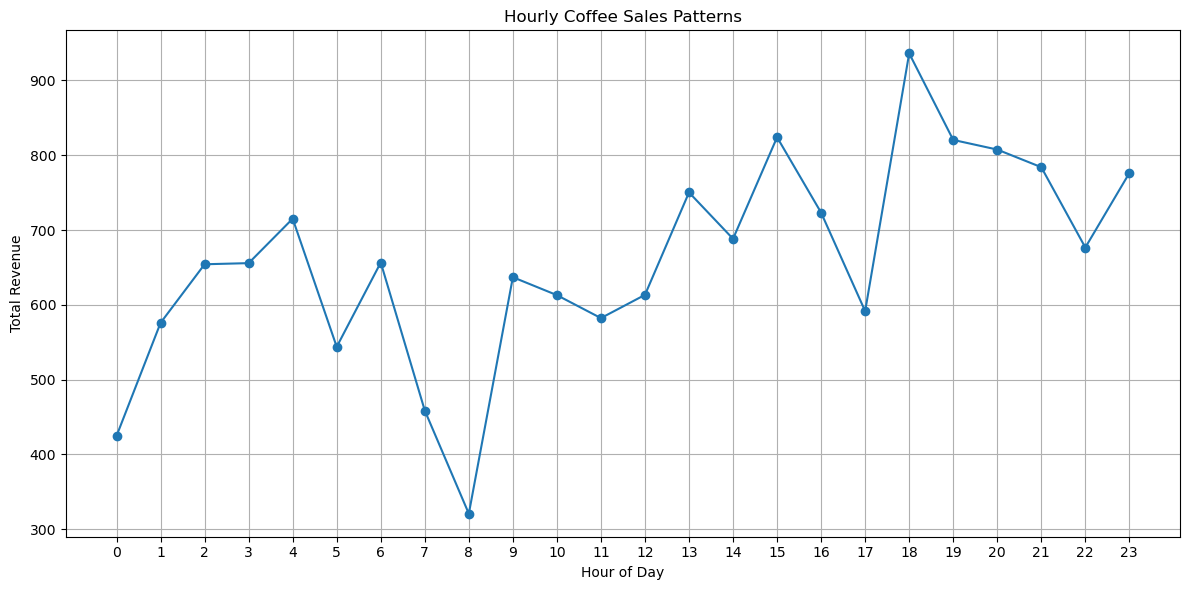

In [47]:
# Group by hour and sum the revenue
hourly_sales = data.groupby('hour').money.sum().reset_index()

# Plot the hourly sales pattern
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales['hour'], hourly_sales['money'], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue')
plt.title('Hourly Coffee Sales Patterns')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


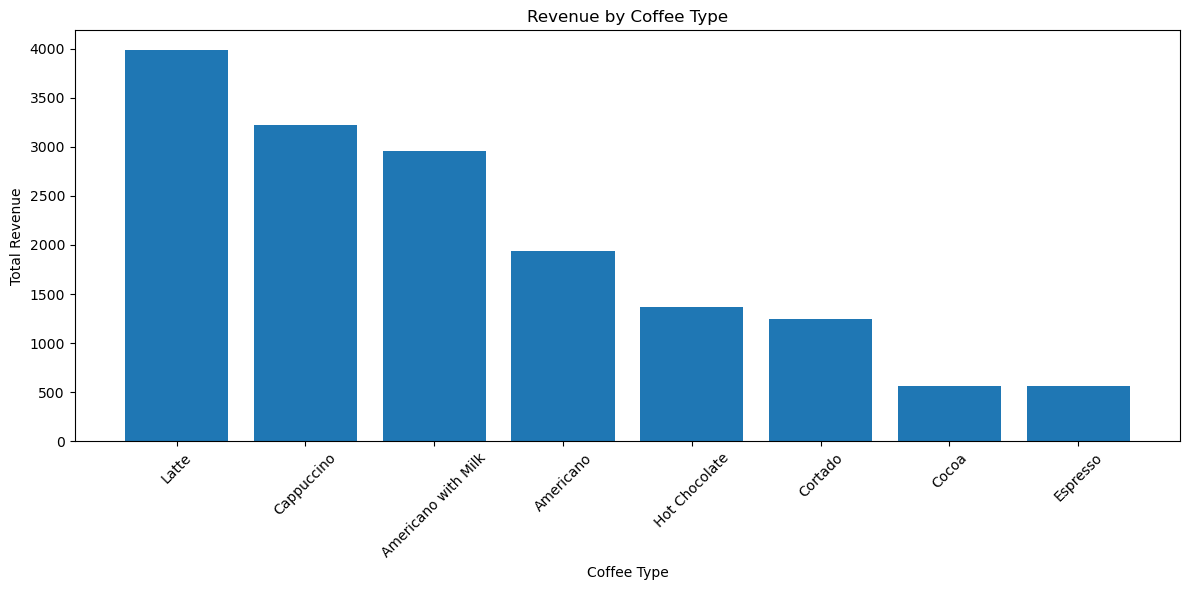

In [48]:
# Group by coffee type and sum the revenue
coffee_revenue = data.groupby('coffee_name').money.sum().reset_index()

# Sort by revenue in descending order
coffee_revenue = coffee_revenue.sort_values(by='money', ascending=False)

# Plot the revenue by coffee type
plt.figure(figsize=(12, 6))
plt.bar(coffee_revenue['coffee_name'], coffee_revenue['money'])
plt.xlabel('Coffee Type')
plt.ylabel('Total Revenue')
plt.title('Revenue by Coffee Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [102]:
data['date'] = pd.to_datetime(data['date'])

data['hour'] =data['date'].dt.hour

# Group by 'hour' and 'coffee_name', then count occurrences of 'date'
hourly_sales_by_coffee = data.groupby(['hour', 'coffee_name']) \
    .count()['date'] \
    .reset_index() \
    .rename(columns={'date': 'count'}) \
    .pivot(index='hour', columns='coffee_name', values='count') \
    .fillna(0) \
    .reset_index()

# Display the result
print(hourly_sales_by_coffee)


coffee_name  hour  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
0               0        169                  268         196     35       99   

coffee_name  Espresso  Hot Chocolate  Latte  
0                  49             74    243  


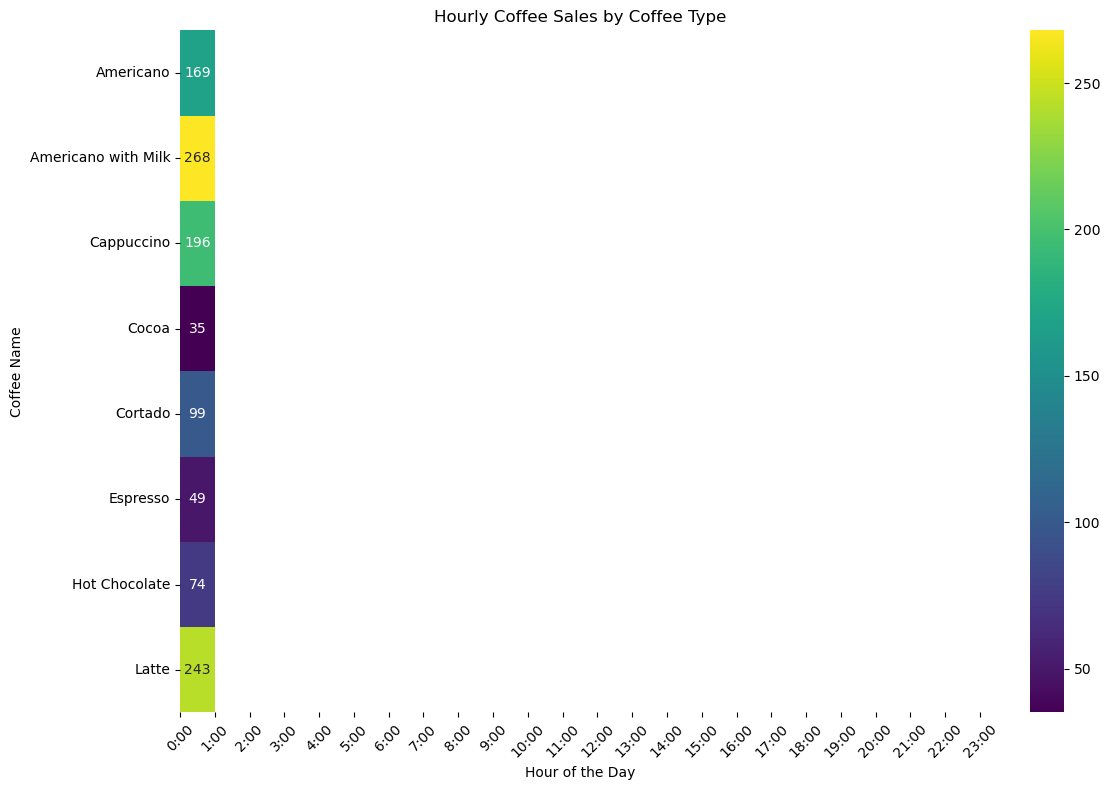

In [103]:
# Plotting hourly sales by coffee
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_sales_by_coffee.set_index('hour').T, cmap='viridis', annot=True, fmt='g')

plt.xlabel('Hour of the Day')
plt.ylabel('Coffee Name')
plt.title('Hourly Coffee Sales by Coffee Type')
plt.xticks(ticks=range(24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

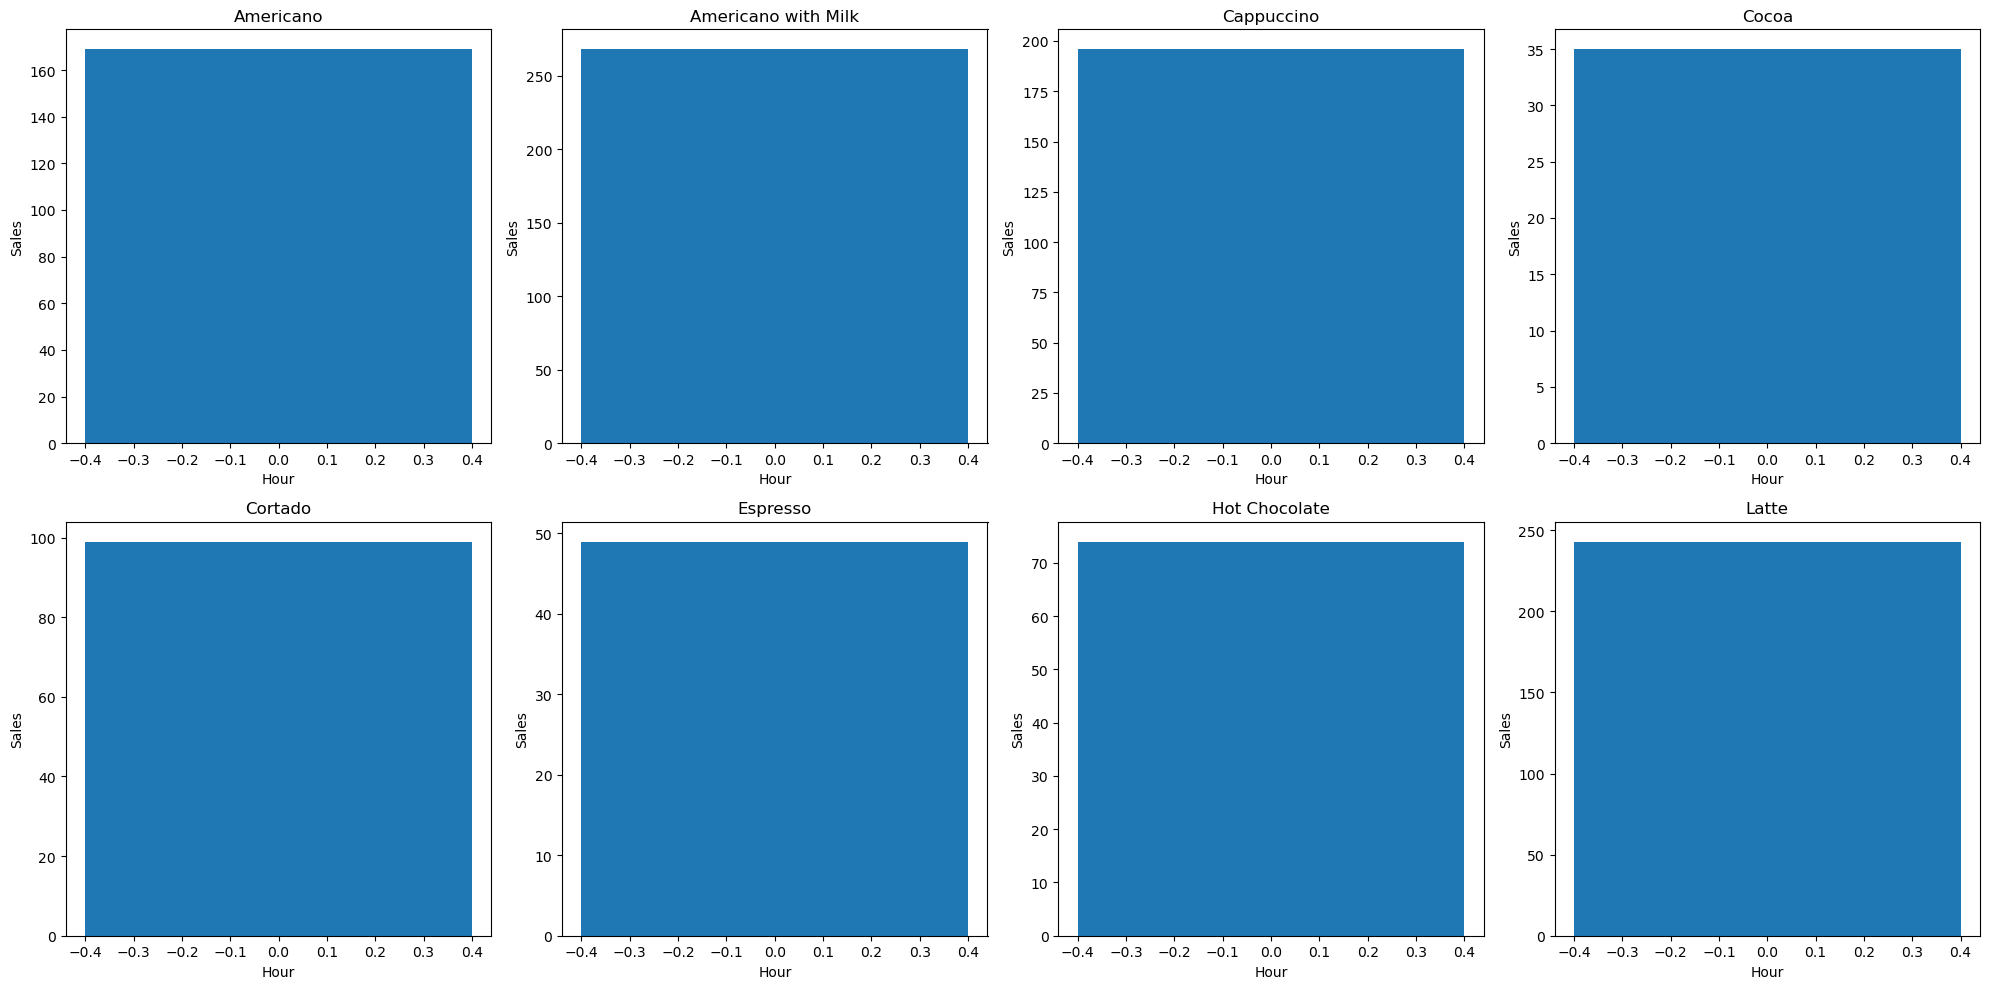

In [104]:
# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the array of subplots for easy iteration
axs = axs.flatten()

# Loop through each column in the DataFrame (except for 'hour')
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):  # Skip the first column ('hour')
    axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Sales')  # Add ylabel for better understanding

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()